#LIBRARY

In [164]:
!pip install dlib
!pip install face_recognition
!pip install opencv-python
!pip install matplotlib 
!pip install scikit-learn
!pip install pickle-mixin

In [165]:
import face_recognition as face_rec
print(face_rec.__version__)

1.2.3


In [166]:
import cv2
print(cv2.__version__)

4.9.0


In [167]:
import matplotlib.pyplot as plt
import os

In [168]:
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report

In [169]:
import numpy as np

In [170]:
import pickle

In [171]:
dir = 'Face/dataset_EC_300/'
test = 'Valid_Test/34_Athip/861.jpg'
evaluate = 'Valid_Test/'

#TRAIN

In [173]:
ENCODINGS = []
NAMES = []

if dir[-1] != '/':
    dir += '/'
    
train_dir = os.listdir(dir)

for person in train_dir:
    pix = os.listdir(dir + person)

    for person_img in pix:
        face = face_rec.load_image_file(dir + person + '/' + person_img)
        print(dir + person + '/' + person_img)
        face_boxes = face_rec.face_locations(face)

        if len(face_boxes) == 1:
            face_enc = face_rec.face_encodings(face)[0]

            ENCODINGS.append(face_enc)
            NAMES.append(person)
        else:
            print(person + "/" + person_img + " can't be used for training")

clf = svm.SVC(gamma ='scale')
clf.fit(ENCODINGS, NAMES)

Face/dataset_EC_300/01_Kritimath/(10).jpg
Face/dataset_EC_300/01_Kritimath/(100).jpg
Face/dataset_EC_300/01_Kritimath/(102).jpg
Face/dataset_EC_300/01_Kritimath/(104).jpg
Face/dataset_EC_300/01_Kritimath/(106).jpg
Face/dataset_EC_300/01_Kritimath/(108).jpg
Face/dataset_EC_300/01_Kritimath/(110).jpg
Face/dataset_EC_300/01_Kritimath/(112).jpg
Face/dataset_EC_300/01_Kritimath/(114).jpg
Face/dataset_EC_300/01_Kritimath/(116).jpg
Face/dataset_EC_300/01_Kritimath/(118).jpg
Face/dataset_EC_300/01_Kritimath/(12).jpg
Face/dataset_EC_300/01_Kritimath/(120).jpg
Face/dataset_EC_300/01_Kritimath/(122).jpg
Face/dataset_EC_300/01_Kritimath/(124).jpg
Face/dataset_EC_300/01_Kritimath/(126).jpg
Face/dataset_EC_300/01_Kritimath/(128).jpg
Face/dataset_EC_300/01_Kritimath/(130).jpg
Face/dataset_EC_300/01_Kritimath/(132).jpg
Face/dataset_EC_300/01_Kritimath/(134).jpg
Face/dataset_EC_300/01_Kritimath/(136).jpg
Face/dataset_EC_300/01_Kritimath/(138).jpg
Face/dataset_EC_300/01_Kritimath/(14).jpg
Face/dataset_E

SVC()

#TEST

Found:
34_Athip


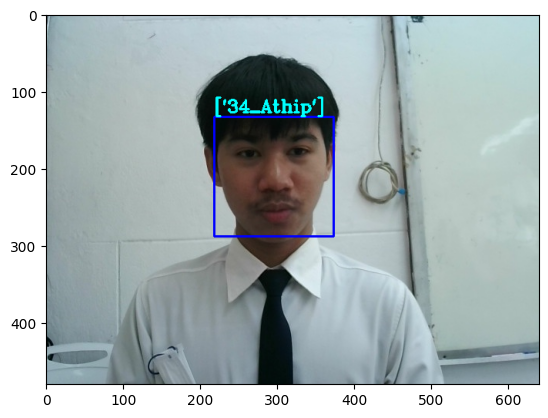

In [175]:
font = cv2.FONT_HERSHEY_COMPLEX

test_image = face_rec.load_image_file(test)

face_locations = face_rec.face_locations(test_image)
no = len(face_locations)
# TEST #
print("Found:")
for i in range(no):
    for(top,right,bottom,left) in face_locations:
        test_image_enc = face_rec.face_encodings(test_image)[i]
        name = clf.predict([test_image_enc])
        print(*name)

        cv2.rectangle(test_image,(left,top),(right,bottom),(0,0,255),2)
        cv2.putText(test_image,str(name),(left,top-6),font,.75,(0,255,255),2)
        plt.imshow(test_image) # RGB
# TEST #


#EVALUATE

In [177]:
# EVALUATE #
labels = []
data_processed = []
cnt = 0
cnt_infor_Face = 0

for folder in os.listdir(evaluate):
    try:
        path = evaluate + folder
        folder_path = os.path.join(evaluate, folder)

        for flie_name in os.listdir(folder_path):
            image_path = os.path.join(path, flie_name)
            #labels.append(folder)

            t_im_eva = face_rec.load_image_file(image_path)
            face_location_eva = face_rec.face_locations(t_im_eva)
            cnt_eva = len(face_location_eva)

            for i in range(cnt_eva):
                labels.append(folder)
        
                for(top,right,bottom,left) in face_location_eva:
                    test_image_enc_eva = face_rec.face_encodings(t_im_eva)[i]
                    name_eva = clf.predict([test_image_enc_eva])
                    print("Name : " + str(name_eva))

                    data_processed.append(name_eva)

                    cnt_infor_Face = cnt_infor_Face + 1
                    print("Cnt Face : " + str(cnt_infor_Face))

    except Exception as e:
        pass

    cnt = cnt + 1
    cnt_infor_face = 0

    print("Got: " + str(cnt))
    
data_processed = np.vstack(data_processed)
# EVALUATE #


Name : ['01_Kritimath']
Cnt Face : 1
Name : ['01_Kritimath']
Cnt Face : 2
Name : ['01_Kritimath']
Cnt Face : 3
Name : ['01_Kritimath']
Cnt Face : 4
Name : ['01_Kritimath']
Cnt Face : 5
Name : ['01_Kritimath']
Cnt Face : 6
Name : ['01_Kritimath']
Cnt Face : 7
Name : ['01_Kritimath']
Cnt Face : 8
Name : ['01_Kritimath']
Cnt Face : 9
Name : ['01_Kritimath']
Cnt Face : 10
Name : ['01_Kritimath']
Cnt Face : 11
Name : ['01_Kritimath']
Cnt Face : 12
Name : ['01_Kritimath']
Cnt Face : 13
Name : ['01_Kritimath']
Cnt Face : 14
Name : ['01_Kritimath']
Cnt Face : 15
Name : ['01_Kritimath']
Cnt Face : 16
Name : ['01_Kritimath']
Cnt Face : 17
Name : ['01_Kritimath']
Cnt Face : 18
Name : ['01_Kritimath']
Cnt Face : 19
Name : ['01_Kritimath']
Cnt Face : 20
Name : ['01_Kritimath']
Cnt Face : 21
Name : ['01_Kritimath']
Cnt Face : 22
Name : ['01_Kritimath']
Cnt Face : 23
Name : ['01_Kritimath']
Cnt Face : 24
Name : ['01_Kritimath']
Cnt Face : 25
Name : ['01_Kritimath']
Cnt Face : 26
Name : ['01_Kritimath

#REPORT

In [179]:
# REPORT #
if(len(labels) == len(data_processed)):
    accuracy = accuracy_score(labels, data_processed)
    classification_rep = classification_report(labels, data_processed)
    print(f'Accuracy: {accuracy}')
    print(classification_rep)

else:
    print("labels != data_processed")
# REPORT #

Accuracy: 0.9959432048681541
                  precision    recall  f1-score   support

    01_Kritimath       0.95      1.00      0.97       130
     02_Jiraphat       1.00      1.00      1.00       150
    03_Chayaphon       1.00      1.00      1.00       150
    04_Chawanwit       1.00      1.00      1.00       150
   05_Chatchawan       1.00      0.99      0.99       134
   06_Tapanapong       0.99      0.99      0.99        68
     07_Thitiwat       0.99      1.00      1.00       113
     08_Nuttawut       1.00      1.00      1.00       135
     09_Nuttawut       1.00      1.00      1.00       150
        10_Tawan       0.99      1.00      1.00       149
     11_Tichanon       0.98      1.00      0.99       136
    12_Thiraphat       1.00      1.00      1.00       148
      13_Nopchai       1.00      1.00      1.00       136
      14_Narawit       1.00      0.97      0.99       137
    15_Nattapong       1.00      1.00      1.00       147
    16_Pancharat       1.00      1.00     

#OLD

#EXPORT MODEL

In [182]:
#save the model
with open('svm_model_EC(300).pkl','wb') as f:
    pickle.dump(clf,f)